<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/NLP/ClusteringText(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [198]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 129.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [199]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples

In [200]:
def pre_clean(string):
  string = string.lower()
  string = re.sub('  ', ' ', re.sub('\n', ' ', string))
  string = re.sub('  ', ' ', re.sub('ay', ' ', string))
  string = re.sub('bis', ' ', re.sub('\n', ' ', string))
  return string

def clean_text(text):
  text = nlp(text)
  text = ' '.join([token.lemma_ for token in text if not token.is_stop and not token.is_punct])
  return text

In [201]:
url  = "https://raw.githubusercontent.com/it-ces/Datasets/main/lyrics-label.txt"
df = pd.read_csv(url)

In [202]:
df['label'].nunique()

2

In [203]:
# Task in class
# Remove links, special characters,

# In class
# Stop words, and root of words!


#TF -IDF vectorization (explain)
# To represent in numerical vectors (there are several methods)


In [204]:
# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load('es_core_news_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TfidVectorizer

* Terme frecuency (TF)
* Inverse Document Frecuency (IDF)


Wich is by document and by courpus?

TF(t,d) term count within the document.
IDF(t) in courpus.


Inverse Document Frequency assest the "relevance" of a term in a document regarding the popularity of the term in the documents of the corpus. major relevance if the term not is frequently used.

$$ TF(t,d)  =  \frac{\alpha (\text{t inside d})}{\alpha(d)} $$


$$ IDF= \frac{ \alpha ( Courpus) }{\alpha( \text{ d contain t }, \forall d \in Courpus)}  $$



In [205]:
df['lyrics'] = df['lyrics'].apply(lambda x : clean_text(pre_clean(x))) # still ay's and bis appear you must remove

In [206]:
df

,lyrics,label
0,oir morenita ir quedar anoche radio abrir lice...,Vallenato
1,hacerte casa aire pa´car vivo poner letrero nu...,Vallenato
2,lejana sabana manaure bonita sabana manaurera ...,Vallenato
3,óyelo rafo pa villa hacer carta pa dín luz fro...,Vallenato
4,píntamir golondrina decir pintor llevá pico es...,Vallenato
...,...,...
203,sufro sufro sufro llegar tierra lejano venir d...,Ranchera
204,venir dicharachero cuidado flor marchita desvi...,Ranchera
205,venir amanecer luz alumbrar devisar amado leva...,Ranchera
206,milpa quedar ranchito yai yai yai casita blanc...,Ranchera


In [207]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['lyrics']).toarray()

In [208]:
X.shape

(208, 3624)

In [209]:
# Reduce dimensionaity to three!
features = X.copy()
pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

In [210]:
X.shape

(208, 2)

In [211]:
X

array([[-0.03848521,  0.08821238],
       [-0.13618526,  0.01646394],
       [-0.13909348,  0.05771271],
       [-0.04182133,  0.10528186],
       [-0.13304274, -0.01939124],
       [-0.0594306 , -0.02569269],
       [ 0.03694044,  0.0290775 ],
       [-0.10986849,  0.03424639],
       [-0.14332067,  0.01970045],
       [-0.12592771,  0.07477102],
       [-0.07090102,  0.02382055],
       [-0.15989433,  0.01525177],
       [-0.05025865, -0.0344001 ],
       [ 0.1249105 , -0.07736646],
       [-0.09151531, -0.00638134],
       [-0.00220519, -0.05535993],
       [-0.02329513,  0.00714405],
       [ 0.19149401, -0.02854623],
       [ 0.07157723,  0.05658476],
       [ 0.14979079, -0.12071624],
       [ 0.036401  ,  0.08832144],
       [-0.03949147, -0.02825968],
       [ 0.09236368,  0.03152859],
       [-0.06820018, -0.04739549],
       [ 0.22463669, -0.22094177],
       [ 0.0394424 , -0.00609011],
       [ 0.08351002, -0.07101052],
       [-0.06246141,  0.12041361],
       [ 0.06501278,

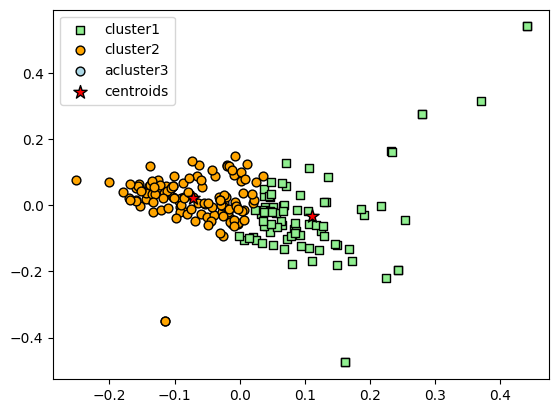

In [212]:
km = KMeans(n_clusters = 2,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

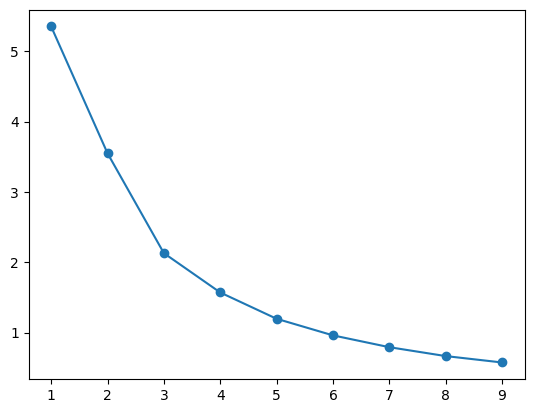

In [213]:
distortions = []
for i in range(1,10):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker='o')

In [214]:
km = KMeans(n_clusters = 2,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
np.mean(silhouette_vals)

np.float64(0.3980664944363319)

In [215]:
km = KMeans(n_clusters = 3,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
np.mean(silhouette_vals)

np.float64(0.437986887014354)

In [216]:
km = KMeans(n_clusters = 4,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
np.mean(silhouette_vals)

np.float64(0.393075125405784)

In [217]:
pca = PCA(n_components=3, random_state=42)
X = pca.fit_transform(features)

/tmp/ipython-input-2599191872.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, cmap='viridis')


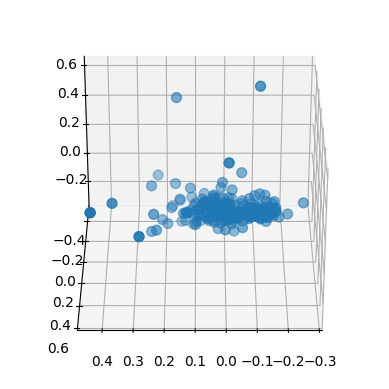

In [218]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, cmap='viridis')
ax.view_init(30,90)

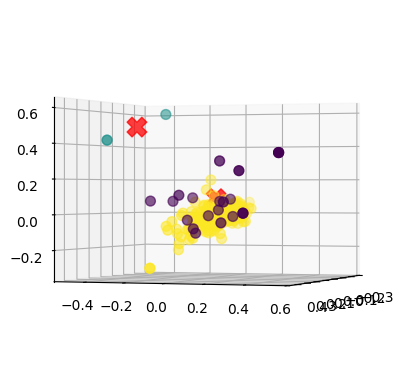

In [219]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50, cmap='viridis')
# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, alpha=0.75, marker='X')
ax.view_init(0,20)

In [220]:
song = """CABALLO de patas blancas con herraduras de aceroooo,
 hoy vas a brincar las trancas antes que el salga lucero,
 a la mujer que yo quiero (bis)
 Por ahí dicen que la muerte me anda siguiendo los PASOS!
 """
clean_text(pre_clean(song))

'caballo pata blanco herradura aceroooo vas brincar tranca salir lucero mujer querer muerte andar seguir paso'